**Imports**

In [1]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from random import randint
from tensorflow.keras import layers,models
from keras.layers import Dense, Dropout
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

2024-03-23 04:21:44.498766: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-23 04:21:44.498905: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-23 04:21:44.635752: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Data Loading**

In [2]:
classes_path = 'C:/Users/User1/Downloads/Grape/augmented-grape-disease-detection-dataset/Final Data/'

class_names = sorted(os.listdir(classes_path))
num_classes = len(class_names)

img_size = (160, 160, 3)

print(f'class names: {class_names}\nclasses number: {num_classes}')

class names: ['Black Rot', 'ESCA', 'Healthy', 'Leaf Blight']
classes number: 4


In [3]:
images = []
labels = []

for cl in class_names:
    for img in os.listdir(classes_path + cl):
        label = np.zeros(num_classes)
        label[class_names.index(cl)] = 1
        labels.append(label)
    
        images.append(np.asarray(Image.open(classes_path + cl + '/' + img).resize(img_size[0:2])))

    
labels = np.asarray(labels)
images = np.asarray(images)

print(f'\n\nlabels shape: {labels.shape}')
print(f'images shape: {images.shape}')



labels shape: (12000, 4)
images shape: (12000, 160, 160, 3)


**Data visualization**

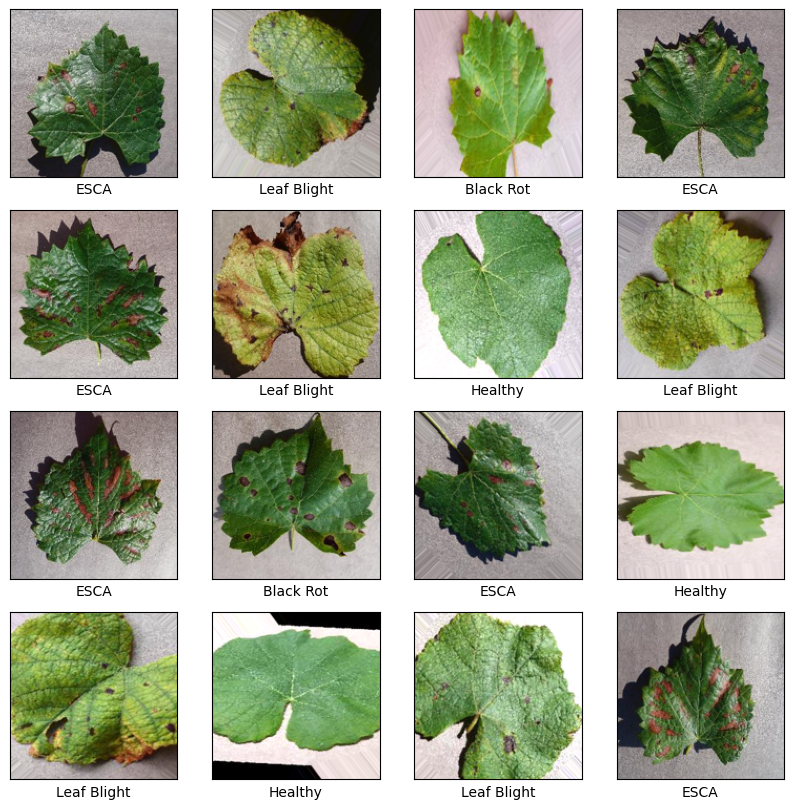

In [4]:
fig, axs = plt.subplots(4, 4, figsize=(10, 10))

for x in range(4):
    for y in range(4):
        i = randint(0, len(images))
        
        axs[x][y].imshow(images[i])
        
        axs[x][y].set_xticks([])
        axs[x][y].set_yticks([])
        axs[x][y].set_xlabel(class_names[np.argmax(labels[i])])
        
plt.show()

**Train Validation Test split**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) 

In [7]:
print(f'train images shape: {X_train.shape}\ntrain labels shape: {y_train.shape}\n\nvalidation images shape: {X_val.shape}\nvalidation labels shape: {y_val.shape}\n\nTest images shape: {X_test.shape}\nTest labels shape: {y_test.shape}')

train images shape: (7200, 160, 160, 3)
train labels shape: (7200, 4)

validation images shape: (2400, 160, 160, 3)
validation labels shape: (2400, 4)

Test images shape: (2400, 160, 160, 3)
Test labels shape: (2400, 4)


#### Model

In [12]:
cnn_model = tf.keras.Sequential()
cnn_model.add(tf.keras.layers.Rescaling(scale=1. / 255, input_shape=(224,224,3)))
#block 1
cnn_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
cnn_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding="same", activation="relu"))
#block 2
cnn_model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding="same", activation="relu"))
#block 3
cnn_model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),strides=(2,2),padding="same", activation="relu"))
#block 4
cnn_model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=(3,3),strides=(2,2),padding="same", activation="relu"))
#block 5
cnn_model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=(3,3),strides=(2,2),padding="same", activation="relu"))
#Flatten layer
cnn_model.add(tf.keras.layers.Flatten())
#Classification part
cnn_model.add(tf.keras.layers.Dense(units=4096,activation="relu"))
cnn_model.add(tf.keras.layers.Dense(units=4096,activation="relu"))
cnn_model.add(tf.keras.layers.Dense(units=4096,activation="relu"))
cnn_model.add(tf.keras.layers.Dense(units=4, activation="softmax"))
cnn_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
print(cnn_model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_11 (Rescaling)    (None, 224, 224, 3)       0         
                                                                 
 conv2d_143 (Conv2D)         (None, 224, 224, 64)      1792      
                                                                 
 conv2d_144 (Conv2D)         (None, 112, 112, 64)      36928     
                                                                 
 conv2d_145 (Conv2D)         (None, 112, 112, 128)     73856     
                                                                 
 conv2d_146 (Conv2D)         (None, 56, 56, 128)       147584    
                                                                 
 conv2d_147 (Conv2D)         (None, 56, 56, 256)       295168    
                                                                 
 conv2d_148 (Conv2D)         (None, 56, 56, 256)     

#### Model training 

In [27]:
history=cnn_model.fit(X_train, y_train, epochs=50, verbose=1, validation_data=(X_val, y_val))

Epoch 1/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 22s 54ms/step - accuracy: 0.4511 - loss: 1.1153 - val_accuracy: 0.6492 - val_loss: 0.6985
Epoch 2/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.7658 - loss: 0.5673 - val_accuracy: 0.9133 - val_loss: 0.2373
Epoch 3/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.8984 - loss: 0.2946 - val_accuracy: 0.9658 - val_loss: 0.0992
Epoch 4/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.9608 - loss: 0.1255 - val_accuracy: 0.9783 - val_loss: 0.0797
Epoch 5/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.9692 - loss: 0.0918 - val_accuracy: 0.9633 - val_loss: 0.1548
Epoch 6/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.9688 - loss: 0.1000 - val_accuracy: 0.9500 - val_loss: 0.1584
Epoch 7/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.9374 - loss: 0.1866 - val_accuracy: 0.9833 - val_loss: 0.0577
Epoch 8/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.9719 - loss: 0.0794 - 

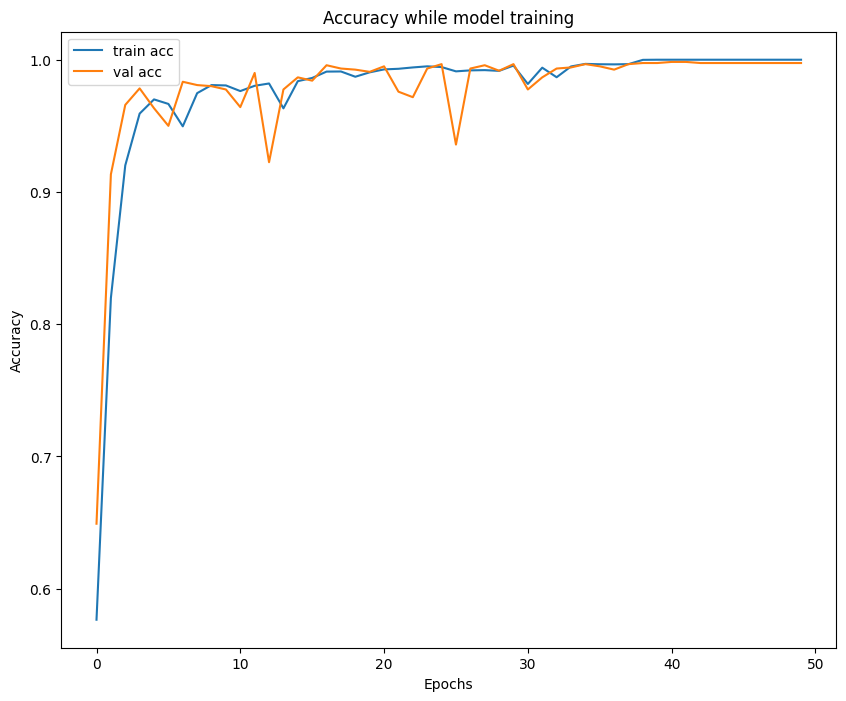

In [28]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy while model training')
plt.show()

#### Model evaluation 

In [31]:
cnn_model.evaluate(X_test, y_test, batch_size=32)

y_pred = cnn_model.predict(X_test)

y_pred=np.argmax(y_pred,axis=1)

75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9999 - loss: 3.9201e-04
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [43]:
y_test = np.argmax(y_test, axis=1)

In [44]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       622
           1       1.00      1.00      1.00       614
           2       1.00      1.00      1.00       553
           3       1.00      1.00      1.00       611

    accuracy                           1.00      2400
   macro avg       1.00      1.00      1.00      2400
weighted avg       1.00      1.00      1.00      2400



[Text(0, 0.5, 'Black Rot'),
 Text(0, 1.5, 'ESCA'),
 Text(0, 2.5, 'Healthy'),
 Text(0, 3.5, 'Leaf Blight')]

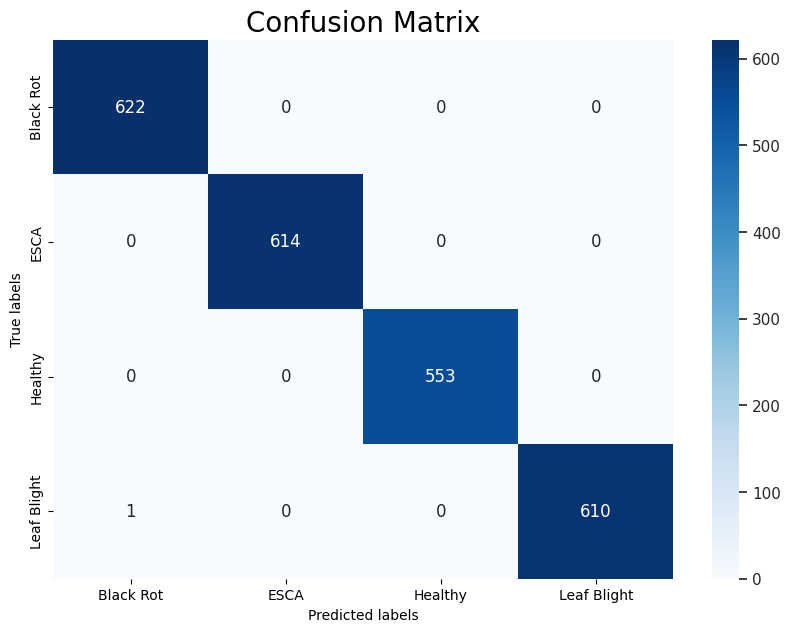

In [47]:
cm = confusion_matrix(y_pred,y_test)

plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.set(font_scale=1.0)
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", ax=ax);

# Labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=10);
ax.set_ylabel('True labels', fontsize=10);
ax.set_title('Confusion Matrix', fontsize=20);
ax.xaxis.set_ticklabels(['Black Rot', 'ESCA', 'Healthy', 'Leaf Blight'], fontsize=10); 
ax.yaxis.set_ticklabels(['Black Rot', 'ESCA', 'Healthy', 'Leaf Blight'], fontsize=10)